In [1]:
import pandas as pd
from matplotlib import pyplot  as plt
%matplotlib inline
import matplotlib
import os
import numpy as np

In [2]:
df = pd.read_csv("Bengaluru_House_Data.csv")

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.shape



(13320, 9)

In [5]:
df1= df.drop(["availability", "society"], axis = "columns")

In [6]:
df1.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [7]:
df1["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [8]:
df1.isnull().sum()

area_type       0
location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [9]:
df3 = df1.dropna()
df3.isnull().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [10]:
df3.shape

(12710, 7)

In [11]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))

<ipython-input-11-4c4c73fbe7f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [12]:
df3.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [13]:
df3['bhk'].unique()

array([ 2,  4,  3,  1,  6,  8,  7,  5, 11,  9, 27, 43, 14, 12, 10, 13],
      dtype=int64)

In [14]:
df3[df3.bhk>20]

,area_type,location,size,total_sqft,bath,balcony,price,bhk
1718,Super built-up Area,2Electronic City Phase II,27 BHK,8000,27.0,0.0,230.0,27
4684,Plot Area,Munnekollal,43 Bedroom,2400,40.0,0.0,660.0,43


In [15]:
df3["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [16]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [17]:
df3[~df3["total_sqft"].apply(is_float)].head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk
30,Super built-up Area,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
122,Super built-up Area,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,Super built-up Area,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Super built-up Area,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,Super built-up Area,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2


In [18]:
def change_toAverage(x):
    tokens = x.split("-")
    if len(tokens) == 2:
        return (float(tokens[0])+ float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None
    

In [19]:
change_toAverage("2145")

2145.0

In [20]:
change_toAverage("2342 - 456")

1399.0

In [21]:
change_toAverage("34sqft.Meter")

In [22]:
df4 = df3.copy()

In [23]:
df4["total_sqft"] =df4["total_sqft"].apply(change_toAverage)
df4.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


In [24]:
df4.loc[30]

area_type     Super built-up  Area
location                 Yelahanka
size                         4 BHK
total_sqft                    2475
bath                             4
balcony                          0
price                          186
bhk                              4
Name: 30, dtype: object

# Feature Engineering


In [25]:
df5 = df4.copy()

In [26]:
df5["price_per_sqft"] = round((df5["price"]*100000)/df5["total_sqft"],3)
df5.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.811
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.385
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.891
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000


In [27]:
len(df5.location.unique())

1265

In [28]:
df5.location = df5.location.apply(lambda x: x.strip())

In [29]:
location_stats = df5.groupby("location")["location"].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield                              515
Sarjapur  Road                          372
Electronic City                         302
Kanakpura Road                          261
Thanisandra                             234
                                       ... 
Kodanda Reddy Layout                      1
Kirloskar layout, Basaveshwarnagar        1
Kengeri Satellite Town Stage II           1
Kengeri Satellite Town KHB Apartment      1
1 Annasandrapalya                         1
Name: location, Length: 1254, dtype: int64

In [30]:
len(location_stats[location_stats <=10])

1017

In [31]:
location_stats_less_than_10 = location_stats[location_stats <=10]
location_stats_less_than_10

location
Kalkere                                 10
Dairy Circle                            10
1st Block Koramangala                   10
Ganga Nagar                             10
Basapura                                10
                                        ..
Kodanda Reddy Layout                     1
Kirloskar layout, Basaveshwarnagar       1
Kengeri Satellite Town Stage II          1
Kengeri Satellite Town KHB Apartment     1
1 Annasandrapalya                        1
Name: location, Length: 1017, dtype: int64

In [32]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

238

In [33]:
df5.head(10)

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.811
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.385
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.891
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000
5,Super built-up Area,Whitefield,2 BHK,1170.0,2.0,1.0,38.00,2,3247.863
8,Super built-up Area,Marathahalli,3 BHK,1310.0,3.0,1.0,63.25,3,4828.244
10,Super built-up Area,Whitefield,3 BHK,1800.0,2.0,2.0,70.00,3,3888.889
11,Plot Area,Whitefield,4 Bedroom,2785.0,5.0,3.0,295.00,4,10592.460
12,Super built-up Area,7th Phase JP Nagar,2 BHK,1000.0,2.0,1.0,38.00,2,3800.000


In [34]:
df5[df5.total_sqft/df5.bhk<400].head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
16,Super built-up Area,Bisuvanahalli,3 BHK,1180.0,3.0,2.0,48.0,3,4067.797
26,Super built-up Area,Electronic City,2 BHK,660.0,1.0,1.0,23.1,2,3500.000
29,Super built-up Area,Electronic City,3 BHK,1025.0,2.0,1.0,47.0,3,4585.366
31,Super built-up Area,Bisuvanahalli,3 BHK,1075.0,2.0,1.0,35.0,3,3255.814
35,Super built-up Area,Kanakpura Road,2 BHK,700.0,2.0,1.0,36.0,2,5142.857


In [35]:
df5.shape

(12710, 9)

In [36]:
df6 = df5[~(df5.total_sqft/df5.bhk<400)]
df6.shape

(11339, 9)

In [37]:
df6.price_per_sqft.describe()

count     11297.000000
mean       6095.775533
std        3844.955454
min         267.830000
25%        4199.024000
50%        5239.852000
75%        6723.584000
max      176470.588000
Name: price_per_sqft, dtype: float64

In [38]:
# function to remove the anomalies of the price per square foot, keeping the df within mean and 1 std
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & ( subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

In [39]:
df7 = remove_pps_outliers(df6)
df7.shape

(9158, 9)

In [40]:
df7.price_per_sqft.describe()

count     9158.000000
mean      5557.922349
std       2098.674343
min       1250.000000
25%       4237.288000
50%       5142.857000
75%       6329.114000
max      24000.000000
Name: price_per_sqft, dtype: float64

In [41]:
def scatter_plot(df, location):
    bhk2 = df[(df.location==location) &(df.bhk==2)]
    bhk3 = df[(df.location == location)& (df.bhk==3)]
    matplotlib.rcParams['figure.figsize']= (15,10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color = 'blue', label= "bhk2", s =50)
    plt.scatter(bhk3.total_sqft, bhk3.price, color = 'red', label= "bhk3", s =80)
    plt.xlabel("total Square feet")
    plt.ylabel("price")
    plt.title(location)
    plt.legend()

    

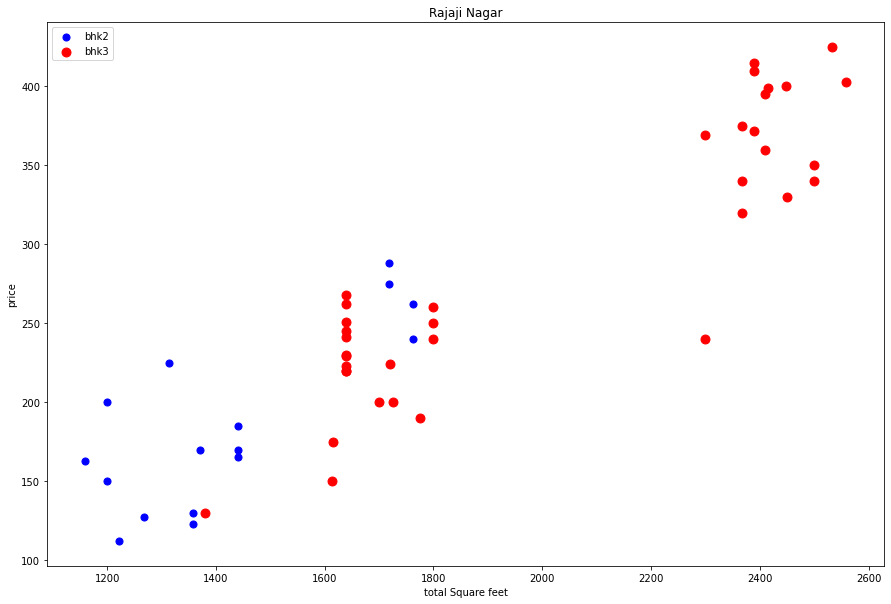

In [42]:
scatter_plot(df7, "Rajaji Nagar")

we can see that the some of the 3 bedroom apt has lower price than the 2 bedroom apt, which might be the potential outliers, so what we gonna do is calculate the mean, standard deviation and count in the given location and remove the data which has lower price than Mean for 3 bedroom apt.

{
    '1' : {
            "mean": 4000
            "std": 2000,
            "count": 34
           },
           
      '2': { "mean": 4500,
            "std": 2300,
            "count": 34
           }
}
              

In [43]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for loc,loc_df in df.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df in loc_df.groupby('bhk'):
            bhk_stats[bhk]= {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in loc_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count'] >5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
    return df.drop(exclude_indices,axis = 'index')

In [44]:
df8 = remove_bhk_outliers(df7)
df8.shape

(6593, 9)

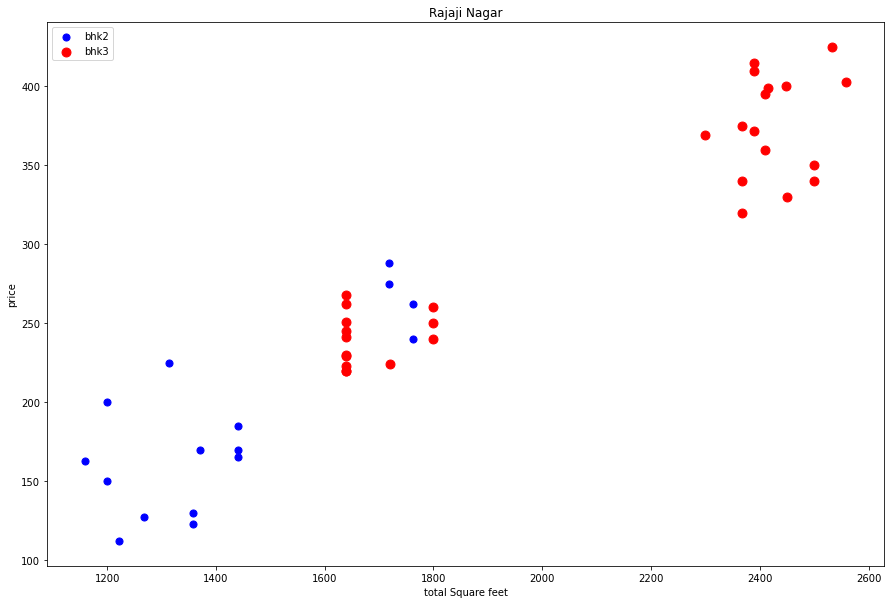

In [45]:
scatter_plot(df8, "Rajaji Nagar")

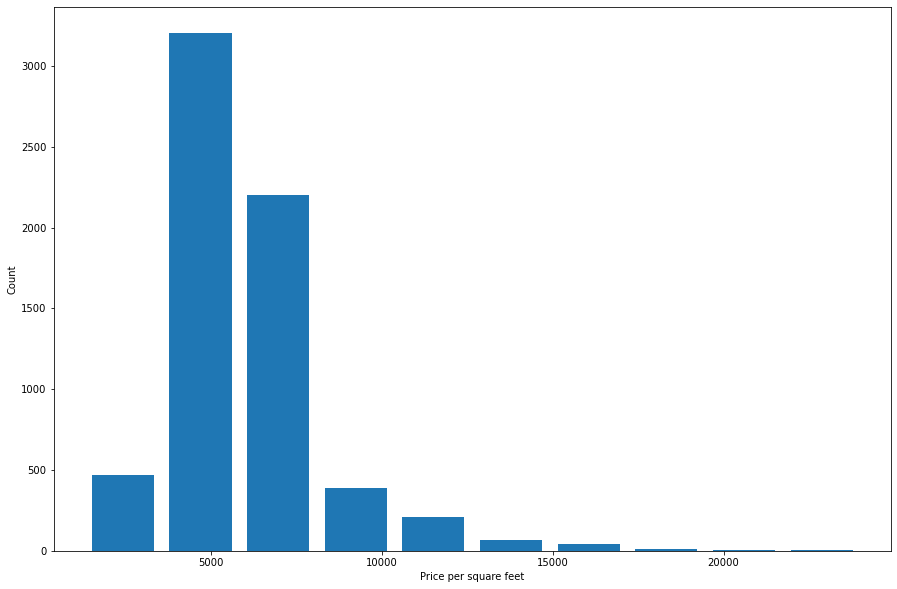

In [46]:
plt.hist(df8.price_per_sqft,rwidth = 0.8)
plt.xlabel("Price per square feet")
plt.ylabel("Count")
plt.show()

In [47]:
df8[df8.bath>8]

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
3308,Built-up Area,KR Puram,9 BHK,4600.0,9.0,2.0,200.0,9,4347.826
4499,Super built-up Area,Mico Layout,9 BHK,5000.0,9.0,3.0,210.0,9,4200.000
7197,Super built-up Area,other,11 BHK,5000.0,9.0,3.0,360.0,11,7200.000
7535,Super built-up Area,other,6 BHK,11338.0,9.0,1.0,1000.0,6,8819.898
8619,Super built-up Area,other,13 BHK,5425.0,13.0,0.0,275.0,13,5069.124


In [48]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(6531, 9)

In [55]:
df10 = df9.drop(['size', 'price_per_sqft','balcony'],axis = 'columns')
df10.head()

,area_type,location,total_sqft,bath,price,bhk
0,Super built-up Area,1st Block Jayanagar,2850.0,4.0,428.0,4
1,Super built-up Area,1st Block Jayanagar,1630.0,3.0,194.0,3
2,Super built-up Area,1st Block Jayanagar,1875.0,2.0,235.0,3
3,Built-up Area,1st Block Jayanagar,1200.0,2.0,130.0,3
4,Super built-up Area,1st Block Jayanagar,1235.0,2.0,148.0,2


In [57]:
dummies = pd.get_dummies(df10.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
df11= pd.concat([df10, dummies.drop('other', axis = 'columns')], axis='columns')
df11.head(5)

,area_type,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Super built-up Area,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Super built-up Area,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Super built-up Area,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Built-up Area,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Super built-up Area,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:

df12 = df11.drop('area_type', axis = 'columns')

df13 = df12.drop('location', axis = 'columns')
df13.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
df13.shape

(6531, 241)

In [77]:
X = df13.drop('price', axis= 'columns')
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
y = df13.price
y.head(5)

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [81]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test,y_test)

0.806604642639576

In [84]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=6, test_size =0.2, random_state=0)

cross_val_score(LinearRegression(),X,y, cv=cv)

array([0.87717043, 0.77784666, 0.75030875, 0.74711847, 0.79221609,
       0.84723628])

# HyperParameter Tuning

In [88]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

def find_best_model(X,y):
    algos = {
        'linear regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'decision_tree':{
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedmen_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=6, test_size =0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
find_best_model(X,y)

C:\Users\sande\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\sande\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pi

C:\Users\sande\AppData\Roaming\Python\Python38\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\sande\AppData\Roaming\Python\Python38\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\sande\AppData\Roaming\Python\Python38\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\sande\AppData\Roaming\Python\Python38\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.wa

,model,best_score,best_params
0,linear regression,0.798649,{'normalize': False}
1,decision_tree,0.732424,"{'criterion': 'mse', 'splitter': 'random'}"


In [89]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Phase JP Nagar', '6th Phase JP Nagar',
       '7th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=240)

In [92]:
np.where(X.columns=="Yelachenahalli")[0][0]

235

In [93]:
def predict_price(location,sqft, bhk, bath):
    loc_index = np.where(X.columns==location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bhk
    x[2] = bath
    if loc_index >=0:
        x[loc_index] = 1
    return lr_clf.predict([x])[0]

In [99]:
predict_price("Indira Nagar", 1000, 2,2)

C:\Users\sande\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


157.33075343784242

In [100]:
predict_price("6th Phase JP Nagar", 1000, 2,2)

C:\Users\sande\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


71.83264843216948

In [101]:
predict_price("Indira Nagar", 1000, 3,2)

C:\Users\sande\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


162.23831501091632

In [102]:
predict_price("6th Phase JP Nagar", 1000, 3,2)

C:\Users\sande\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


76.74021000524337

In [103]:
import json
columns = {
    'data_columns': [col.lower() for col in X.columns]
    
}
with open('columns.json', 'w') as f:
    f.write(json.dumps(columns))

In [104]:
import pickle
with open('Home_price_model.pickle', 'wb') as f:
    pickle.dump(lr_clf,f)